Bolded text = **do not change**

Italics text = *replace with your own words*


******************
*******************

# **Description of data**

*Describe your dataset and what you want to analyze*
 


*******************
*******************
# **Libraries**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files

*******************
*******************
# **Functions used in notebook**

*If you write a function to help with any of your sections, please put that function here*

In [2]:
# Functions that you develop

*******************
*******************
# **Getting data**

*Provide Pseudocode*

In [3]:
# Code for acquiring data
uploaded = files.upload()
data = pd.read_csv('anime.csv')

Saving anime.csv to anime (2).csv


In [4]:
# Display first 5 rows of data
print(data.shape)
data.head()

(11153, 7)


,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [5]:
# Display last 5 rows of data
data.tail()

,anime_id,name,genre,type,episodes,rating,members
11148,730,Houkago no Shokuinshitsu,"Drama, Romance, Yaoi",OVA,2,5.23,4550
11149,6546,Pico: My Little Summer Story,Yaoi,OVA,1,5.21,5551
11150,30663,Docchi mo Maid,"Action, Comedy, Ecchi, Yuri",ONA,1,5.15,223
11151,34382,Citrus,"Drama, Romance, School, Yuri",NaN,Unknown,NaN,2459
11152,33654,Hitorijime My Hero,Yaoi,NaN,Unknown,NaN,1574


In [6]:
# Show data.info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11153 entries, 0 to 11152
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  11153 non-null  int64  
 1   name      11153 non-null  object 
 2   genre     11091 non-null  object 
 3   type      11128 non-null  object 
 4   episodes  11153 non-null  object 
 5   rating    10931 non-null  float64
 6   members   11153 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 610.1+ KB


In [7]:
# Show data.describe
data.describe()

,anime_id,rating,members
count,11153.000000,10931.000000,1.115300e+04
mean,14474.201291,6.504232,1.964841e+04
std,11551.022750,1.049568,5.731263e+04
min,1.000000,1.670000,5.000000e+00
25%,3508.000000,5.900000,1.890000e+02
50%,10774.000000,6.620000,1.452000e+03
75%,25597.000000,7.240000,1.166900e+04
max,34527.000000,10.000000,1.013917e+06


***************
***************
# **Visualizing data**

*Provide relevant pseudocode*

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


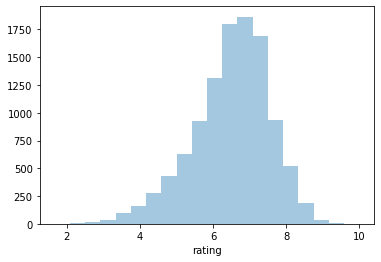

In [8]:
# visualization 1: Distribution for ratings given to the animes
sns.distplot(data['rating'],kde=False,bins = 20)

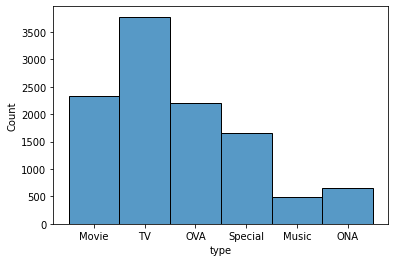

In [25]:
# visualization 2: Histogram of the media that each anime appears on
sns.histplot(data['type'],kde=False,bins=20)

In [43]:
# visualization 3


In [11]:
# visualization 4

In [12]:
# visualization 5

In [13]:
# visualization 6

***************
***************
# **Feature Engineering**

*If making specific choices (e.g., binning data, dummy coding, etc), please describe what you plan to do here*

*Provide relevant pseudocode*


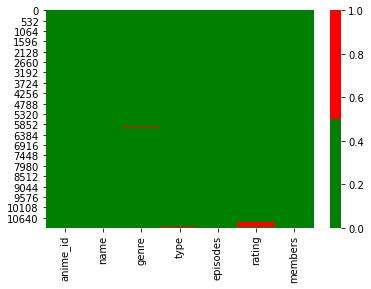

In [14]:
# Check and take care of null values
#Create a heatmap to visualize missing data
sns.heatmap(data.isnull(),cmap=['Green', 'Red'])

#Replace unknown strings with NaNs
data = data.replace('Unknown', np.nan)

#Drop rows with Nans ratings
data = data.dropna(thresh = 5)

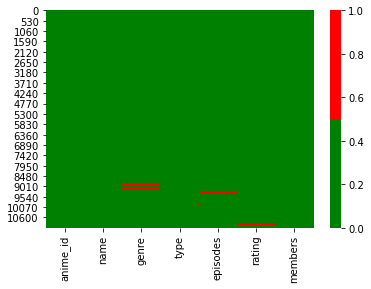

In [15]:
#Heatmap after dropping rows with more than 2 NaN values
sns.heatmap(data.isnull(),cmap=['Green', 'Red'])

In [16]:
#Checking the rows that has NaN values and see if there are anything that needs to be cleaned up
is_NaN = data.isnull() 
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = data[row_has_NaN]
rows_with_NaN

,anime_id,name,genre,type,episodes,rating,members
74,21,One Piece,"Action, Adventure, Comedy, Drama, Fantasy, Sho...",TV,NaN,8.58,504862
252,235,Detective Conan,"Adventure, Comedy, Mystery, Police, Shounen",TV,NaN,8.25,114702
615,1735,Naruto: Shippuuden,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,NaN,7.94,533578
991,966,Crayon Shin-chan,"Comedy, Ecchi, Kids, School, Shounen, Slice of...",TV,NaN,7.73,26267
1021,33157,Tanaka-kun wa Itsumo Kedaruge Specials,"Comedy, School, Slice of Life",Special,NaN,7.72,5400
...,...,...,...,...,...,...,...
11109,34471,Youkai Watch Movie 4,"Comedy, Kids, Supernatural",Movie,1,NaN,169
11110,34284,Yuuki Yuuna wa Yuusha de Aru: Washio Sumi no Shou,"Drama, Fantasy, Magic, Slice of Life",TV,6,NaN,2593
11111,34445,Yuuki Yuuna wa Yuusha de Aru: Yuusha no Shou,"Drama, Fantasy, Magic, Slice of Life",TV,6,NaN,4439
11112,33035,Yuyushiki Special,NaN,Special,1,NaN,2294


I decided to not drop the rest of the NaNs value just because the majority of the NaNs values are from episode numbers, and they are not too important. For the ratings, 

In [30]:
# Check and take care of string values
data['genre'] = data['genre'].str.replace("Slice of Life", "SliceofLife")
data['genre'] = data['genre'].str.replace("Super Power", "SuperPower")

In [18]:
# Check for duplicated values
any(data.duplicated())

False

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11121 entries, 0 to 11150
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  11121 non-null  int64  
 1   name      11121 non-null  object 
 2   genre     11069 non-null  object 
 3   type      11121 non-null  object 
 4   episodes  10853 non-null  object 
 5   rating    10931 non-null  float64
 6   members   11121 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 695.1+ KB


In [20]:
# Check and take care of outliers
outlier1 = data[(data['rating'] < 0)]
outlier2 =  data[(data['rating'] > 10)]    
outlier_list = [outlier1,outlier2]             
outliers = pd.concat(outlier_list)
outliers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  0 non-null      int64  
 1   name      0 non-null      object 
 2   genre     0 non-null      object 
 3   type      0 non-null      object 
 4   episodes  0 non-null      object 
 5   rating    0 non-null      float64
 6   members   0 non-null      int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 0.0+ bytes


In [21]:
#Dummy coding variables:
#I will be dummy coding the data['genre'] column. Right now, there are more than 
#3000 unique values in this column, so I'm trying to format the data better in 
#order to see if certain genre affects the ratings of an anime

#As you can see, there are at least 13 different unique values for genre, and I
#will need to merge this data somehow to make a new dataframe of categories and 
#their ratings. From there, I will be able to make a visualization of the relationship
#between genre and ratings.

In [36]:
#Creating a new dataframe that splits the description of genres
genre10 = data
genre10['genre'].str.split(expand=True)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,"Drama,","Romance,","School,",Supernatural,None,None,None,None,None,None,None,None,None,None
1,"Action,","Adventure,","Drama,","Fantasy,","Magic,","Military,",Shounen,None,None,None,None,None,None,None
2,"Action,","Comedy,","Historical,","Parody,","Samurai,","Sci-Fi,",Shounen,None,None,None,None,None,None,None
3,"Sci-Fi,",Thriller,None,None,None,None,None,None,None,None,None,None,None,None
4,"Action,","Comedy,","Historical,","Parody,","Samurai,","Sci-Fi,",Shounen,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11146,"Ecchi,",Yuri,None,None,None,None,None,None,None,None,None,None,None,None
11147,"Action,","Horror,","Sci-Fi,","Supernatural,","Vampire,",Yaoi,None,None,None,None,None,None,None,None
11148,"Drama,","Romance,",Yaoi,None,None,None,None,None,None,None,None,None,None,None
11149,Yaoi,None,None,None,None,None,None,None,None,None,None,None,None,None


***************
***************
# **Analysis section**

*Provide relevant pseudocode for linear regression or classification*

In [23]:
# Machine Learning 1

In [24]:
# Machine Learning 2, if needed

***************
***************
# **Conclusions**

*Describe what you found and learned from your evaluation of your dataset*